In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts

# Гамма-распределние #

$f_{X}(x)=\left\{{\begin{matrix}x^{{k-1}}{\frac  {e^{{-x/\theta }}}{\theta ^{k}\,\Gamma (k)}},&x\geq 0\\0,&x<0\end{matrix}}\right.,\spaceгде\space {\displaystyle \Gamma (k)}\space—\spaceгамма-функция\spaceЭйлера, k\space—\spaceпараметр\spaceформы,\space{\frac{1}{\theta}}\space—\spaceпараметр\spaceмасштаба.$

$Зададим\spaceпараметр\spaceформы\space{k=1.5},\spaceа\spaceпараметр\spaceмасштаба\space{{\frac{1}{\theta}}=2.71}.$
$Сгенерируем\spaceвыборку\spaceи\spaceпостроим\spaceгистограмму.$

Text(0.5,0,'$x$')

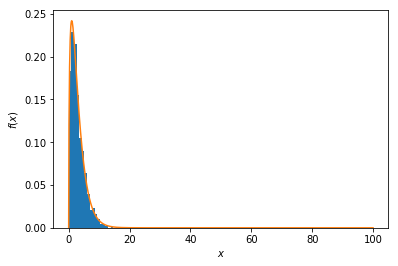

In [83]:
k, sc = 1.5, 2.71 # scale = 1 / theta
gamma = sts.gamma(k, scale=scale)
sample = gamma.rvs(1000)
plt.hist(sample, bins=20, normed=True)
x = np.linspace(0, 100, 1000)
plt.plot(x, gamma.pdf(x))
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

$Зададим\space{generate\_sample}\spaceдля\spaceгенерации\spaceвыборки\spaceразмера\space{size}\spaceиз\spaceсредних\spaceзначений\spaceвыборок\spaceразмера\space{number}\spaceгамма-распределения.$

In [84]:
def generate_sample(number, size):
    global gamma
    return [np.average(gamma.rvs(number)) for _ in range(size)]

In [85]:
print "Выборка 4-ех при выборках на 10 элементах:\n\t", generate_sample(10, 4)
print "Выборка 4-ех при выборках на 10000 элементах:\n\t", generate_sample(10000, 4)

Выборка 4-ех при выборках на 10 элементах:
	[2.4917375570992553, 2.620043902096064, 2.285617887918126, 2.2619908839058316]
Выборка 4-ех при выборках на 10000 элементах:
	[3.0259565794433163, 2.992073951545727, 2.984547993905202, 3.0270332601348637]


$Вычислим\spaceматематическое\spaceожидание\spaceи\spaceдисперсию\spaceдля\spaceприменения\spaceЦПТ.$

In [86]:
mean = gamma.mean() # матожидание
var = gamma.var()   # дисперсия

In [87]:
print mean, var

3.0 6.0


$Построим\spaceгистограммы\spaceдля\space{n}\in\left\{5,\space10,\space50\right\}\spaceи\spaceнормальное\spaceраспределение:$

In [88]:
# функция для построения и отображения соответствующей гистограммы и нормального распределения
def show(n):
    sample = generate_sample(n, 1000)
    plt.hist(sample, bins=20, normed=True)
    normal = sts.norm(mean, (var / float(n)) ** 0.5)
    x = np.linspace(0, 22.5, 1000)
    plt.plot(x, normal.pdf(x))
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

${n=5}$

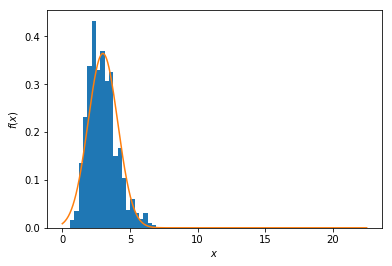

In [89]:
show(n=5)

${n=10}$

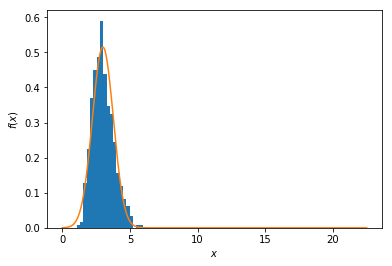

In [90]:
show(n=10)

${n=50}$

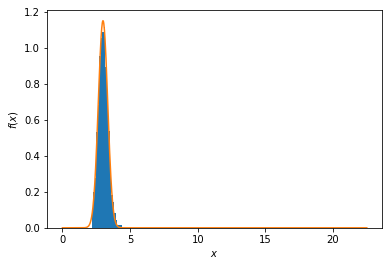

In [91]:
show(n=50)

## Вывод: ##

$Гистограммы\spaceпоказывают,\spaceчто\spaceпри\spaceувеличении\spaceобъема\spaceвыборки\spaceулучшается\spaceаппроксимация\spaceраспределения\spaceнормальным.$